In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/Pyter/DA/BaiTap/shopeep_koreantop_clothing_shop_data.csv',header=0)
data

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,20210706449182992,2021-07-06,449182992,Yacent_thrift_Clo,May,22,2021,16,115,08:45:30,86,"Legazpi City,Albay",0,32,0,5.00,0,0
742,20210706396605392,2021-07-06,396605392,Akistore.ph,March,3,2021,84,84,08:01:23,91,NaN,1,9,0,4.60,0,0
743,20210706360379308,2021-07-06,360379308,Yzanice Shop,December,20,2020,78,5982,08:46:30,96,NaN,16,463,16,4.75,1,0
744,2021070629392066,2021-07-06,29392066,Clairecvc Shop,August,2,2017,964,44029,12:19:44,73,"Binondo,Metro Manila",1960,103289,3982,4.78,0,0


# Yêu cầu vẽ biểu đồ kết hợp để trực quan hóa thông tin sau:

-Vẽ biểu đồ:\
    So sánh số lượng shop gia nhập theo các năm.\
    Xu hướng của số lượng shop gia nhập theo từng tháng trong từng năm.\
-Vẽ biểu đồ thể hiện mối quan hệ giữa \
    Tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt\
    Thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá tốt.\
Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình. 

In [2]:
# month = [(data['join_month']=='January'),(data['join_month']=='February'),(data['join_month']=='March'),
#         (data['join_month']=='April'),(data['join_month']=='May'),(data['join_month']=='June'),
#         (data['join_month']=='July'),(data['join_month']=='August'),(data['join_month']=='September'),
#         (data['join_month']=='October'),(data['join_month']=='November'),(data['join_month']=='December')]
# so = ['1','2','3','4','5','6','7','8','9','10','11','12']
# data['Month'] = np.select(month,so)
# data['Month'] = data['Month'].astype('int64')
df = data.groupby('join_year')['join_month'].count()

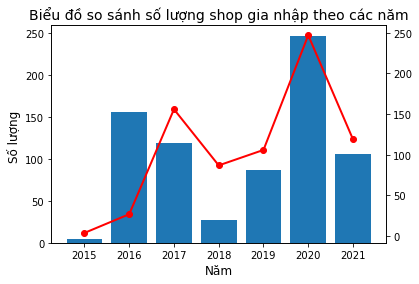

In [3]:
plt.bar(data['join_year'].unique(), data['join_year'].value_counts())
axes1 = plt.gca()
axes2 = axes1.twinx()
axes2.plot(df.index,df, label = 'Month', linewidth = 2, c = 'r', marker = 'o')

axes1.set_xlabel('Năm', fontsize = 12)
axes1.set_ylabel('Số lượng ', fontsize = 12)

plt.title('Biểu đồ so sánh số lượng shop gia nhập theo các năm', fontsize = 14)
plt.show() 

In [4]:
data.loc[:,'Hour']=pd.to_datetime(data.loc[:,'response_time'],format=' %H:%M:%S').dt.hour
data.loc[:,'Minute']=pd.to_datetime(data.loc[:,'response_time'],format=' %H:%M:%S').dt.minute
data.loc[:,'Second']=pd.to_datetime(data.loc[:,'response_time'],format=' %H:%M:%S').dt.second
data['Giây'] = (data['Hour']*3600) + (data['Minute']*60) + data['Second']
data.loc[:,['response_time','Hour', 'Minute', 'Second','Giây']]


,response_time,Hour,Minute,Second,Giây
0,10:13:55,10,13,55,36835
1,10:43:05,10,43,5,38585
2,08:32:07,8,32,7,30727
3,09:10:38,9,10,38,33038
4,11:40:59,11,40,59,42059
...,...,...,...,...,...
741,08:45:30,8,45,30,31530
742,08:01:23,8,1,23,28883
743,08:46:30,8,46,30,31590
744,12:19:44,12,19,44,44384


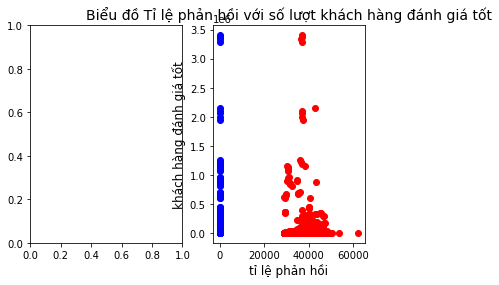

In [5]:
fig, ax = plt.subplots(1, 2)
plt.scatter(data['response_rate'], data['rating_good'], color='b')
plt.scatter( data['Giây'],data['rating_good'], color='r')
plt.title('Biểu đồ Tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt', fontsize = 14)
plt.ylabel('khách hàng đánh giá tốt', fontsize = 12)
plt.xlabel('tỉ lệ phản hồi', fontsize = 12)
plt.show()

Text(0.5, 0, 'thời gian phản hồi (đơn vị giây)')

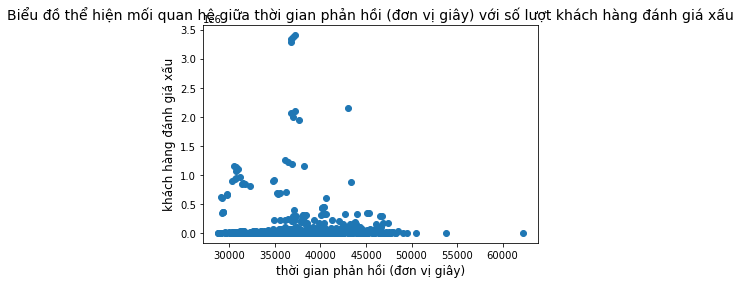

In [6]:
plt.scatter( data['Giây'],data['rating_good'])
plt.title('Biểu đồ thể hiện mối quan hệ giữa thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá xấu', fontsize = 14)
plt.ylabel('khách hàng đánh giá xấu', fontsize = 12)
plt.xlabel('thời gian phản hồi (đơn vị giây)', fontsize = 12)

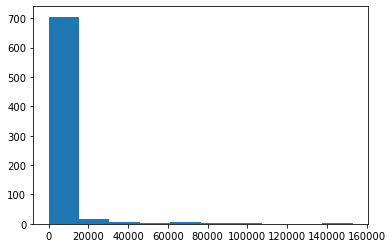

In [11]:
plt.hist(data['rating_normal'])
plt.show()